In [6]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [7]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


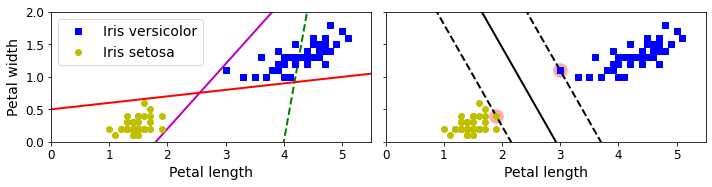

In [8]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


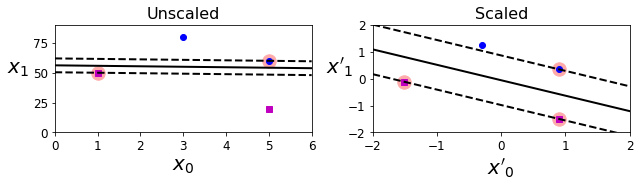

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


Saving figure sensitivity_to_feature_scales_plot


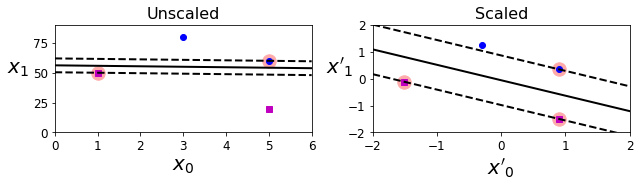

In [10]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1


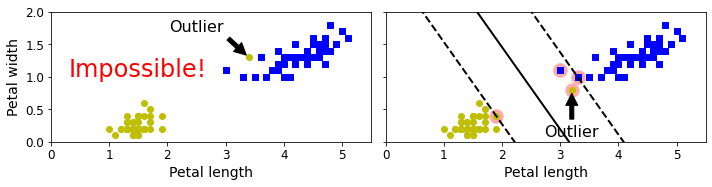

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10


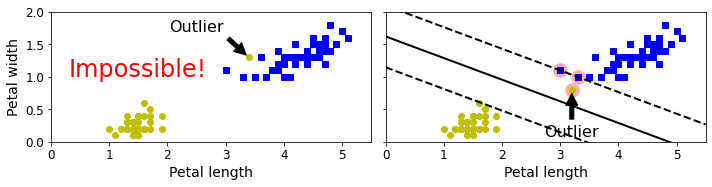

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100


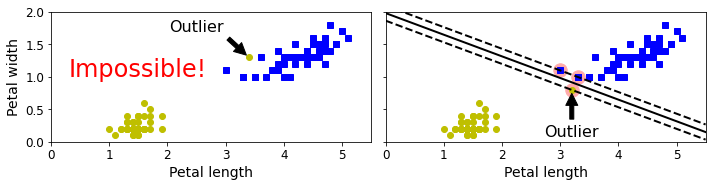

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1000


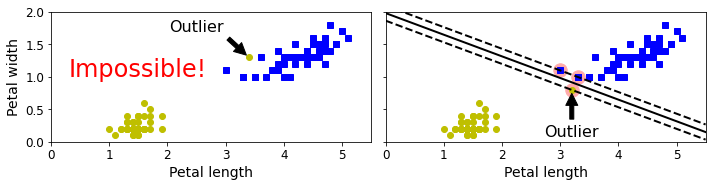

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10000


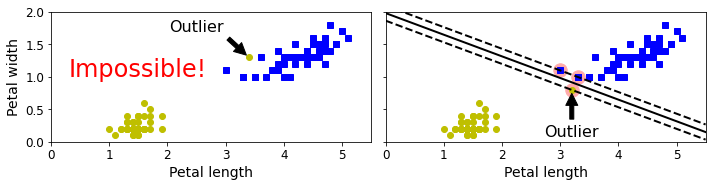

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100000


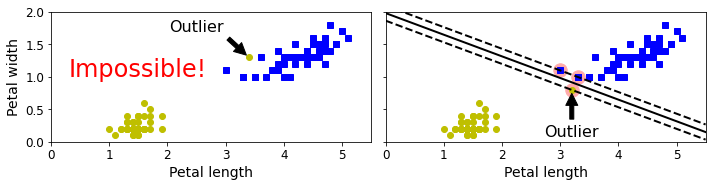

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1000000


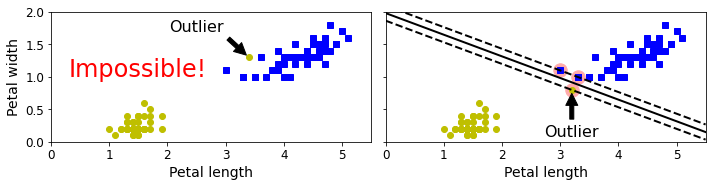

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10000000


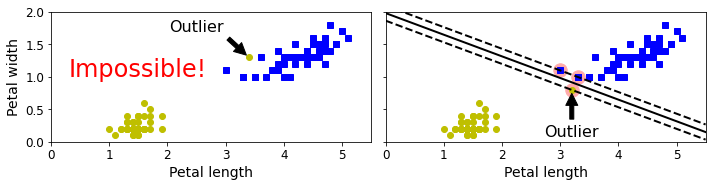

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100000000


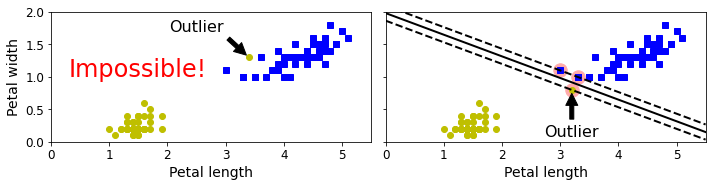

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100000000


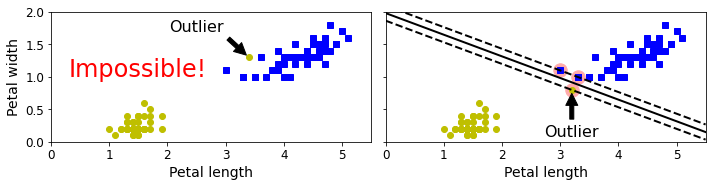

In [11]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)
steps=[1,10,100,1000,10000,100000,1000000,10000000,100000000,100000000]

for cs in steps:

    svm_clf2 = SVC(kernel="linear", C=cs)
    svm_clf2.fit(Xo2, yo2)

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
    plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
    plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.annotate("Outlier",
                xy=(X_outliers[0][0], X_outliers[0][1]),
                xytext=(2.5, 1.7),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.1),
                fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    plt.sca(axes[1])
    plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
    plot_svc_decision_boundary(svm_clf2, 0, 5.5)
    plt.xlabel("Petal length", fontsize=14)
    plt.annotate("Outlier",
                xy=(X_outliers[1][0], X_outliers[1][1]),
                xytext=(3.2, 0.08),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.1),
                fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    save_fig("sensitivity_to_outliers_plot")
    print("for the norminal value of C = ",cs)
    plt.show()

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1


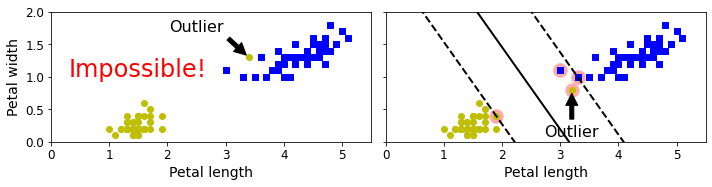

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10


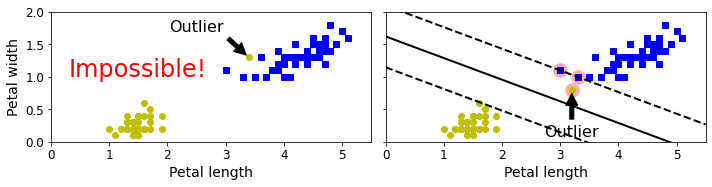

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100


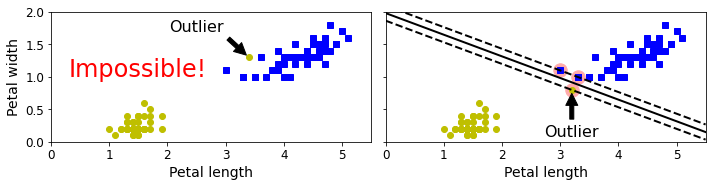

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1000


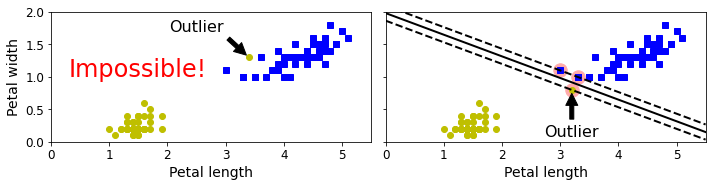

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10000


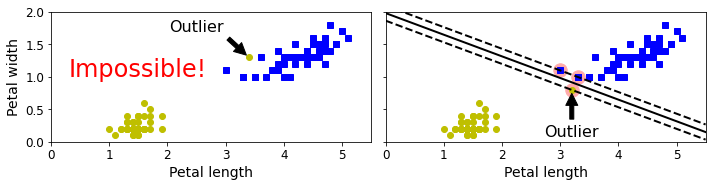

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100000


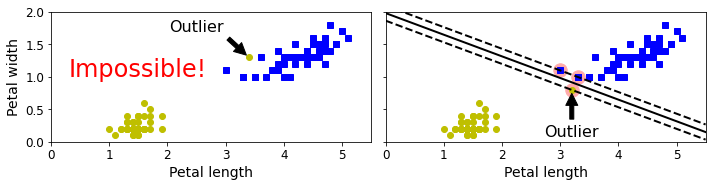

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1000000


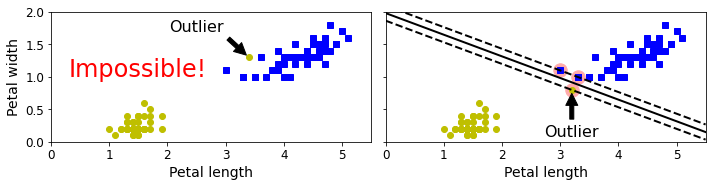

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  10000000


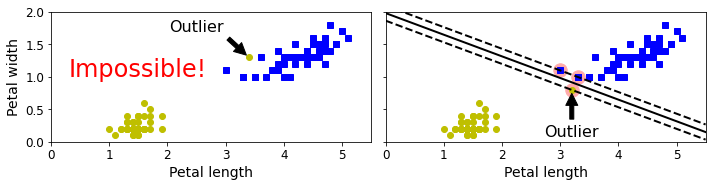

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  100000000


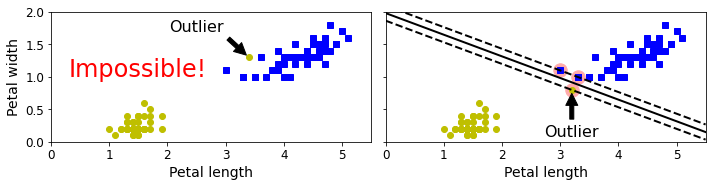

Saving figure sensitivity_to_outliers_plot
for the norminal value of C =  1000000000


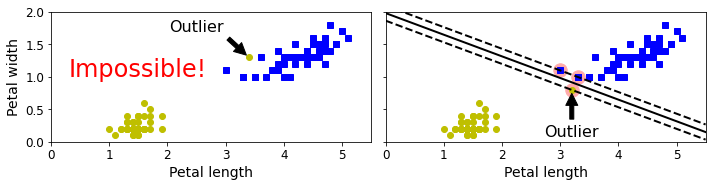

In [12]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)
steps=[1,10,100,1000,10000,100000,1000000,10000000,100000000,100000000]

for increasing_power in range(10):

    svm_clf2 = SVC(kernel="linear", C=10**increasing_power)
    svm_clf2.fit(Xo2, yo2)

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
    plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
    plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.annotate("Outlier",
                xy=(X_outliers[0][0], X_outliers[0][1]),
                xytext=(2.5, 1.7),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.1),
                fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    plt.sca(axes[1])
    plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
    plot_svc_decision_boundary(svm_clf2, 0, 5.5)
    plt.xlabel("Petal length", fontsize=14)
    plt.annotate("Outlier",
                xy=(X_outliers[1][0], X_outliers[1][1]),
                xytext=(3.2, 0.08),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.1),
                fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    save_fig("sensitivity_to_outliers_plot")
    print("for the norminal value of C = ",10**increasing_power)
    plt.show()

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris=datasets.load_iris()
X=iris['data'][:,(2,3)] #petal length and petal width
y=(iris['target']==2).astype(np.float64)

svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge")),
    #("sgd_classifier",SGDClassifier()), #you can only have linear_svc or sgd_classifier but not both
    ])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [14]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [24]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf=Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=174,loss="hinge"))

])

polynomial_svm_clf.fit(X,y)

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=174, loss='hinge'))])

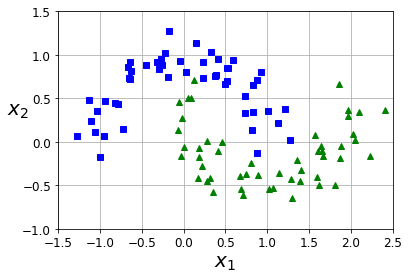

In [25]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Saving figure moons_polynomial_svc_plot


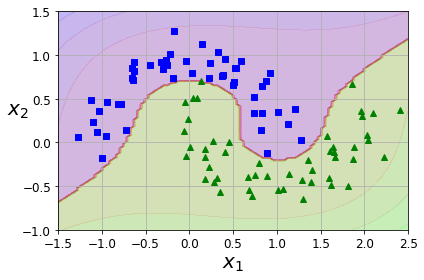

In [26]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

In [31]:
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=100,C=5))
])

poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


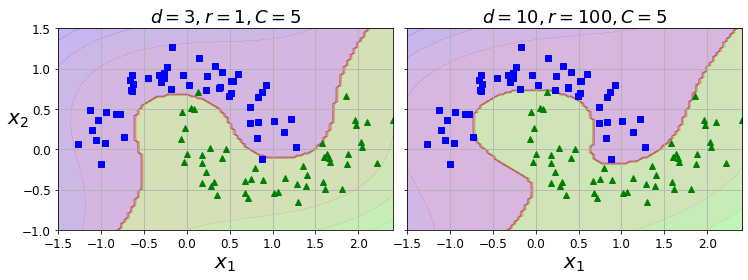

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")

In [34]:
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


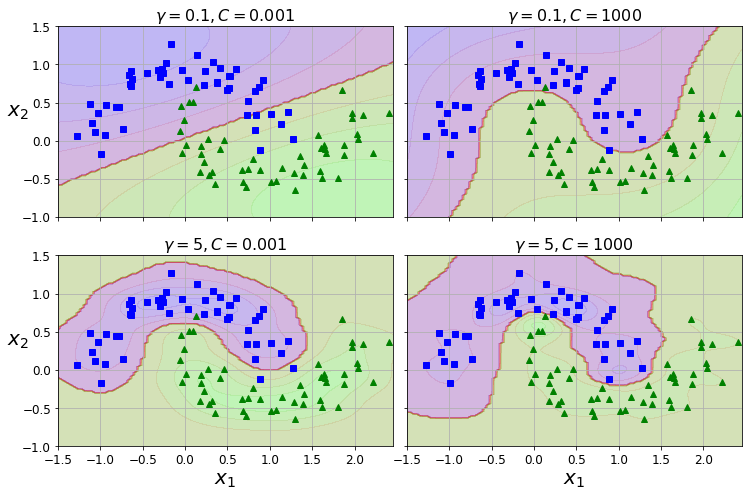

In [35]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()
